### generate the daily stock return dispersion

In [43]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go


# Get the current working directory (assuming the notebook is in the same directory as the file)
current_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(current_directory)

import sys
sys.path.append(parent_directory)
from py_scripts.utils import sns_hist, plotly_line, beautify

### one day forward return visulization and cleaning

In [2]:
df = pd.read_parquet('../Data/Panel/SP500_Clean.pq')

In [3]:
df = df.sort_values(by=['Symbol', 'Date']).reset_index(drop = True)
df['forward_1d_return'] = np.log(df.groupby('Symbol')['Close'].shift(-1) / df['Close'])
df['forward_1d_return'] = df['forward_1d_return'].fillna(0)

In [4]:
df['forward_1d_return'].describe()

count    1.326553e+06
mean     4.088920e-04
std      2.217385e-02
min     -1.409060e+00
25%     -8.351039e-03
50%      5.202810e-04
75%      9.420733e-03
max      7.178757e-01
Name: forward_1d_return, dtype: float64

In [5]:
df.sort_values('forward_1d_return').head()

Date     Open     High      Low    Close    Volume  OpenInt  \
527095  2010-07-06    6.680    6.730    6.210    6.220    165232        0   
48413   2008-09-12  284.070  288.730  215.430  227.620    853137        0   
1116253 2009-01-16   34.371   34.503   30.725   32.020  10100938        0   
581488  2008-10-29   16.884   18.907   16.330   17.529   8929291        0   
171464  2008-11-18    2.310    2.310    1.710    1.810    102356        0   

        Symbol  ref_price  forward_1d_return  
527095     gen     6.4500          -1.409060  
48413      aig   255.8450          -0.936225  
1116253    stt    33.1955          -0.892452  
581488     hig    17.2065          -0.724826  
171464    bldr     2.0600          -0.613530

In [6]:
df.iloc[[527095, 527096]].to_latex(index=False, caption='Example of an abnormally large forward return', label='tab:abnormal_return')

'\\begin{table}\n\\caption{Example of an abnormally large forward return}\n\\label{tab:abnormal_return}\n\\begin{tabular}{lrrrrrrlrr}\n\\toprule\nDate & Open & High & Low & Close & Volume & OpenInt & Symbol & ref_price & forward_1d_return \\\\\n\\midrule\n2010-07-06 00:00:00 & 6.680000 & 6.730000 & 6.210000 & 6.220000 & 165232 & 0 & gen & 6.450000 & -1.409060 \\\\\n2010-07-07 00:00:00 & 2.930000 & 3.050000 & 1.430000 & 1.520000 & 12540047 & 0 & gen & 2.225000 & 0.431441 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'

In [7]:
df.iloc[[48413, 48414]].to_latex(index=False, caption='Example of an abnormally large forward return')

'\\begin{table}\n\\caption{Example of an abnormally large forward return}\n\\begin{tabular}{lrrrrrrlrr}\n\\toprule\nDate & Open & High & Low & Close & Volume & OpenInt & Symbol & ref_price & forward_1d_return \\\\\n\\midrule\n2008-09-12 00:00:00 & 284.070000 & 288.730000 & 215.430000 & 227.620000 & 853137 & 0 & aig & 255.845000 & -0.936225 \\\\\n2008-09-15 00:00:00 & 133.520000 & 149.840000 & 65.624000 & 89.251000 & 1971692 & 0 & aig & 111.385500 & -0.238496 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'

In [8]:
LQR = df['forward_1d_return'].quantile(0.75) - df['forward_1d_return'].quantile(0.25)
abnormal_ind = np.where((df['forward_1d_return'] > df['forward_1d_return'].quantile(0.75) + 3 * LQR) | (df['forward_1d_return'] < df['forward_1d_return'].quantile(0.25) - 3 * LQR))[0]

In [9]:
df['forward_1d_return'].quantile(0.75) + 3 * LQR, df['forward_1d_return'].quantile(0.25) - 3 * LQR

(0.06273605128658741, -0.06166635747475653)

In [10]:
len(abnormal_ind)/df.shape[0]

0.01981225024556124

In [11]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326553 entries, 0 to 1326552
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Date               1326553 non-null  datetime64[ns]
 1   Open               1326553 non-null  float64       
 2   High               1326553 non-null  float64       
 3   Low                1326553 non-null  float64       
 4   Close              1326553 non-null  float64       
 5   Volume             1326553 non-null  int64         
 6   OpenInt            1326553 non-null  int64         
 7   Symbol             1326553 non-null  object        
 8   ref_price          1326553 non-null  float64       
 9   forward_1d_return  1326553 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 101.2+ MB


((1326553, 10), None)

In [12]:
df = df[~df.index.isin(abnormal_ind)].reset_index(drop = True)

### visulization the 1d return

{'figsize': [8, 5], 'bins': 20, 'kde': True}


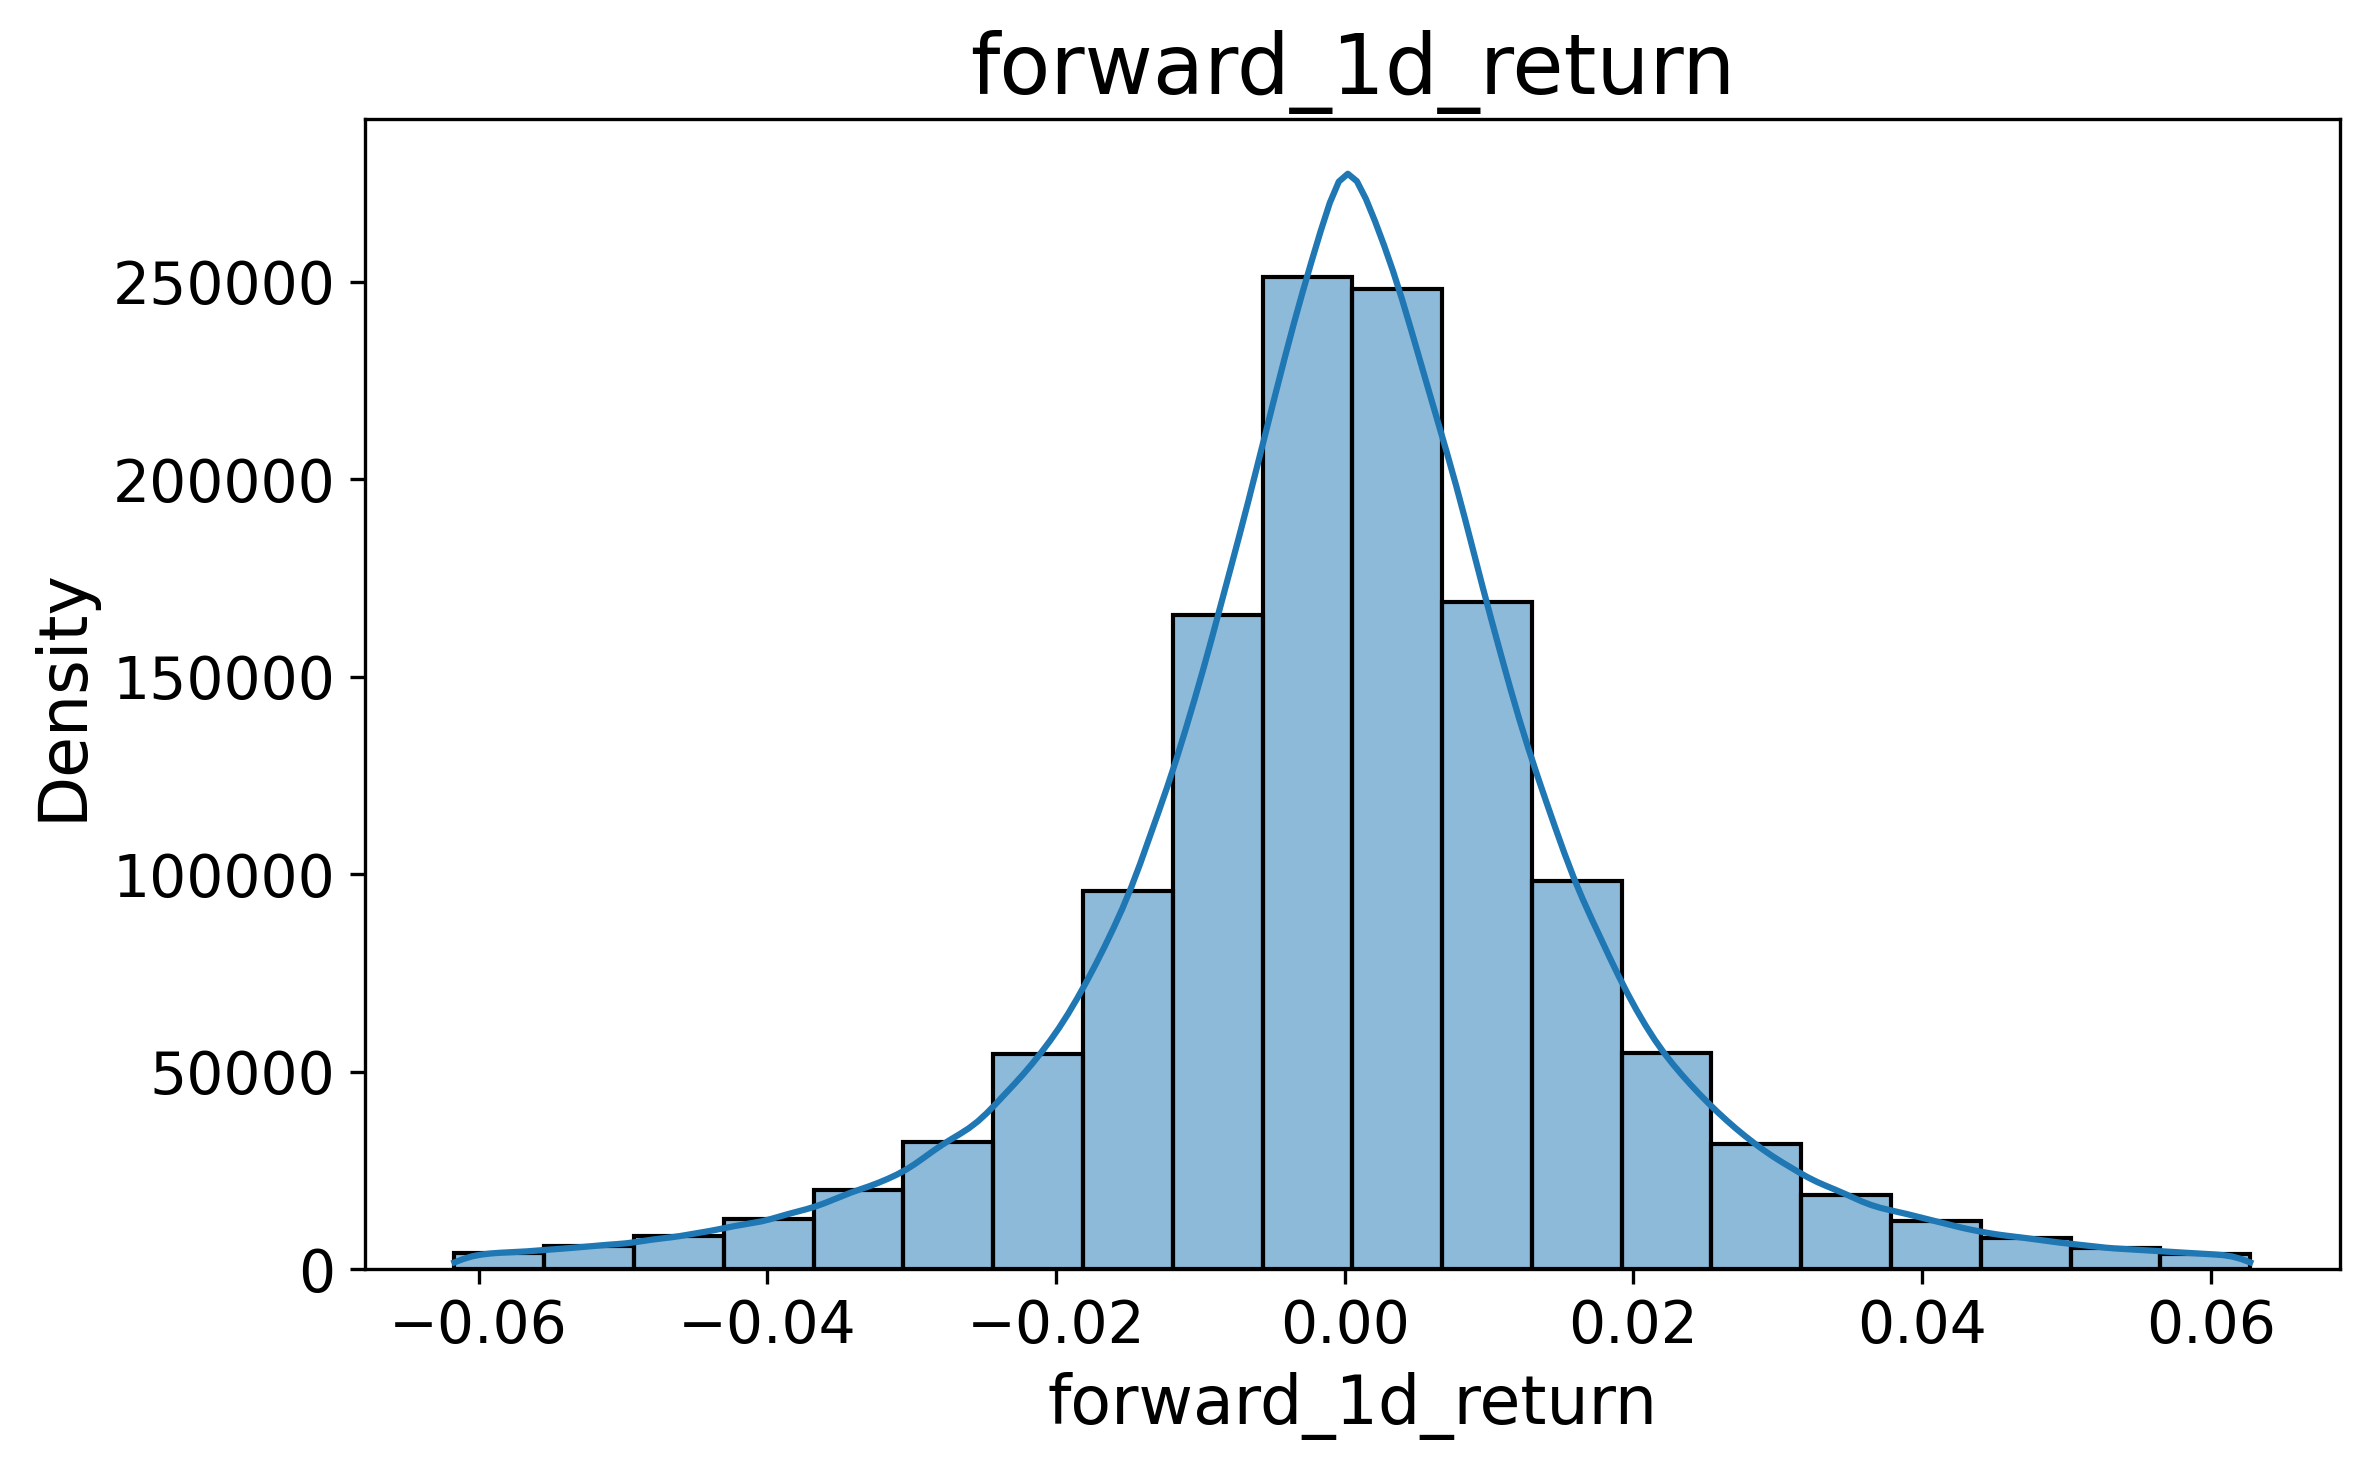

In [13]:
sns_hist(df, col = 'forward_1d_return', xlabel = 'forward_1d_return', ylabel = 'Density', title = 'forward_1d_return', save_path = 'forward_1d_return')

In [14]:
df['forward_1d_return'].describe()

count    1.300271e+06
mean     4.813209e-04
std      1.662678e-02
min     -6.166547e-02
25%     -8.095148e-03
50%      5.305040e-04
75%      9.204494e-03
max      6.273584e-02
Name: forward_1d_return, dtype: float64

In [15]:
df.to_parquet('../Data/Panel/SP500_CleanRet.pq')

### return dispersion

In [16]:
df = pd.read_parquet('../Data/Panel/SP500_CleanRet.pq')

df['b_in_ret'] = np.log(df['Close']/df['Open']).fillna(0)
df['b_ov_ret'] = np.log(df['Open']/df.groupby('Symbol')['Close'].shift()).fillna(0)
df['b_1d_ret'] = np.log(df['Close']/df.groupby('Symbol')['Close'].shift()).fillna(0)

df['f_ov_ret'] = np.log(df.groupby('Symbol')['Open'].shift(-1)/df['Close']).fillna(0)
df['f_in_ret'] = np.log(df.groupby('Symbol')['Close'].shift(-1)/df.groupby('Symbol')['Open'].shift(-1)).fillna(0)
df['f_1d_ret'] = np.log(df.groupby('Symbol')['Close'].shift(-1)/df['Close']).fillna(0)

df.sort_values('Date', inplace = True)
df = df.reset_index(drop = True)

In [18]:
assert df.loc[np.where(np.abs(df['f_ov_ret'] + df['f_in_ret'] - df['f_1d_ret'])>1e-8)[0]].shape[0] == 0, "one day return is not equals to the sum of intra-day and overnight"

In [39]:
rets_col = ['b_in_ret', 'b_ov_ret', 'b_1d_ret', 'f_in_ret', 'f_ov_ret', 'f_1d_ret']
rets_disp_col = list()
ret_disp = pd.DataFrame({'Date': sorted(pd.to_datetime(df.Date.unique()))})

ret_disp_lst = []
for ret in rets_col:
    ret_disp_lst.append(df.groupby('Date')[ret].std().rename(f"{ret}_disp"))
    rets_disp_col.append(f'{ret}_disp')

ret_disp = pd.concat(ret_disp_lst, axis = 1).reset_index()

In [21]:
plotly_line(ret_disp, xcol = 'Date', ycols = ['f_in_ret_disp', 'f_ov_ret_disp', 'f_1d_ret_disp'], title = 'ret_disp Line Plot', yaxis_title = 'Disp')

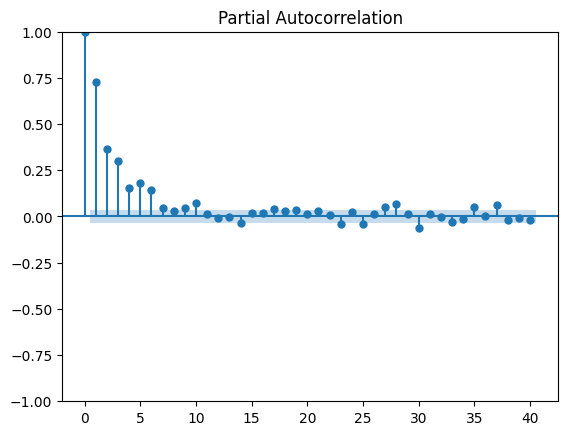

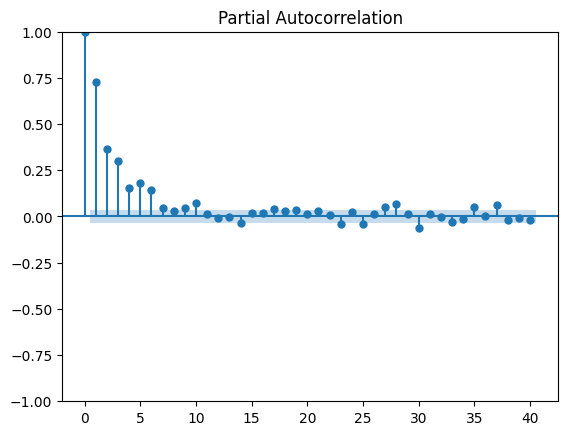

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(ret_disp['f_1d_ret_disp'].values.squeeze(), lags=40, method="ywm")

# Generate the PACF plot
fig = plot_pacf(ret_disp['f_1d_ret_disp'].values.squeeze(), lags=40, method="ywm")

# Save the figure
fig.savefig('../figures/pacf_plot.png')

{'figsize': [8, 5], 'bins': 20, 'kde': True}


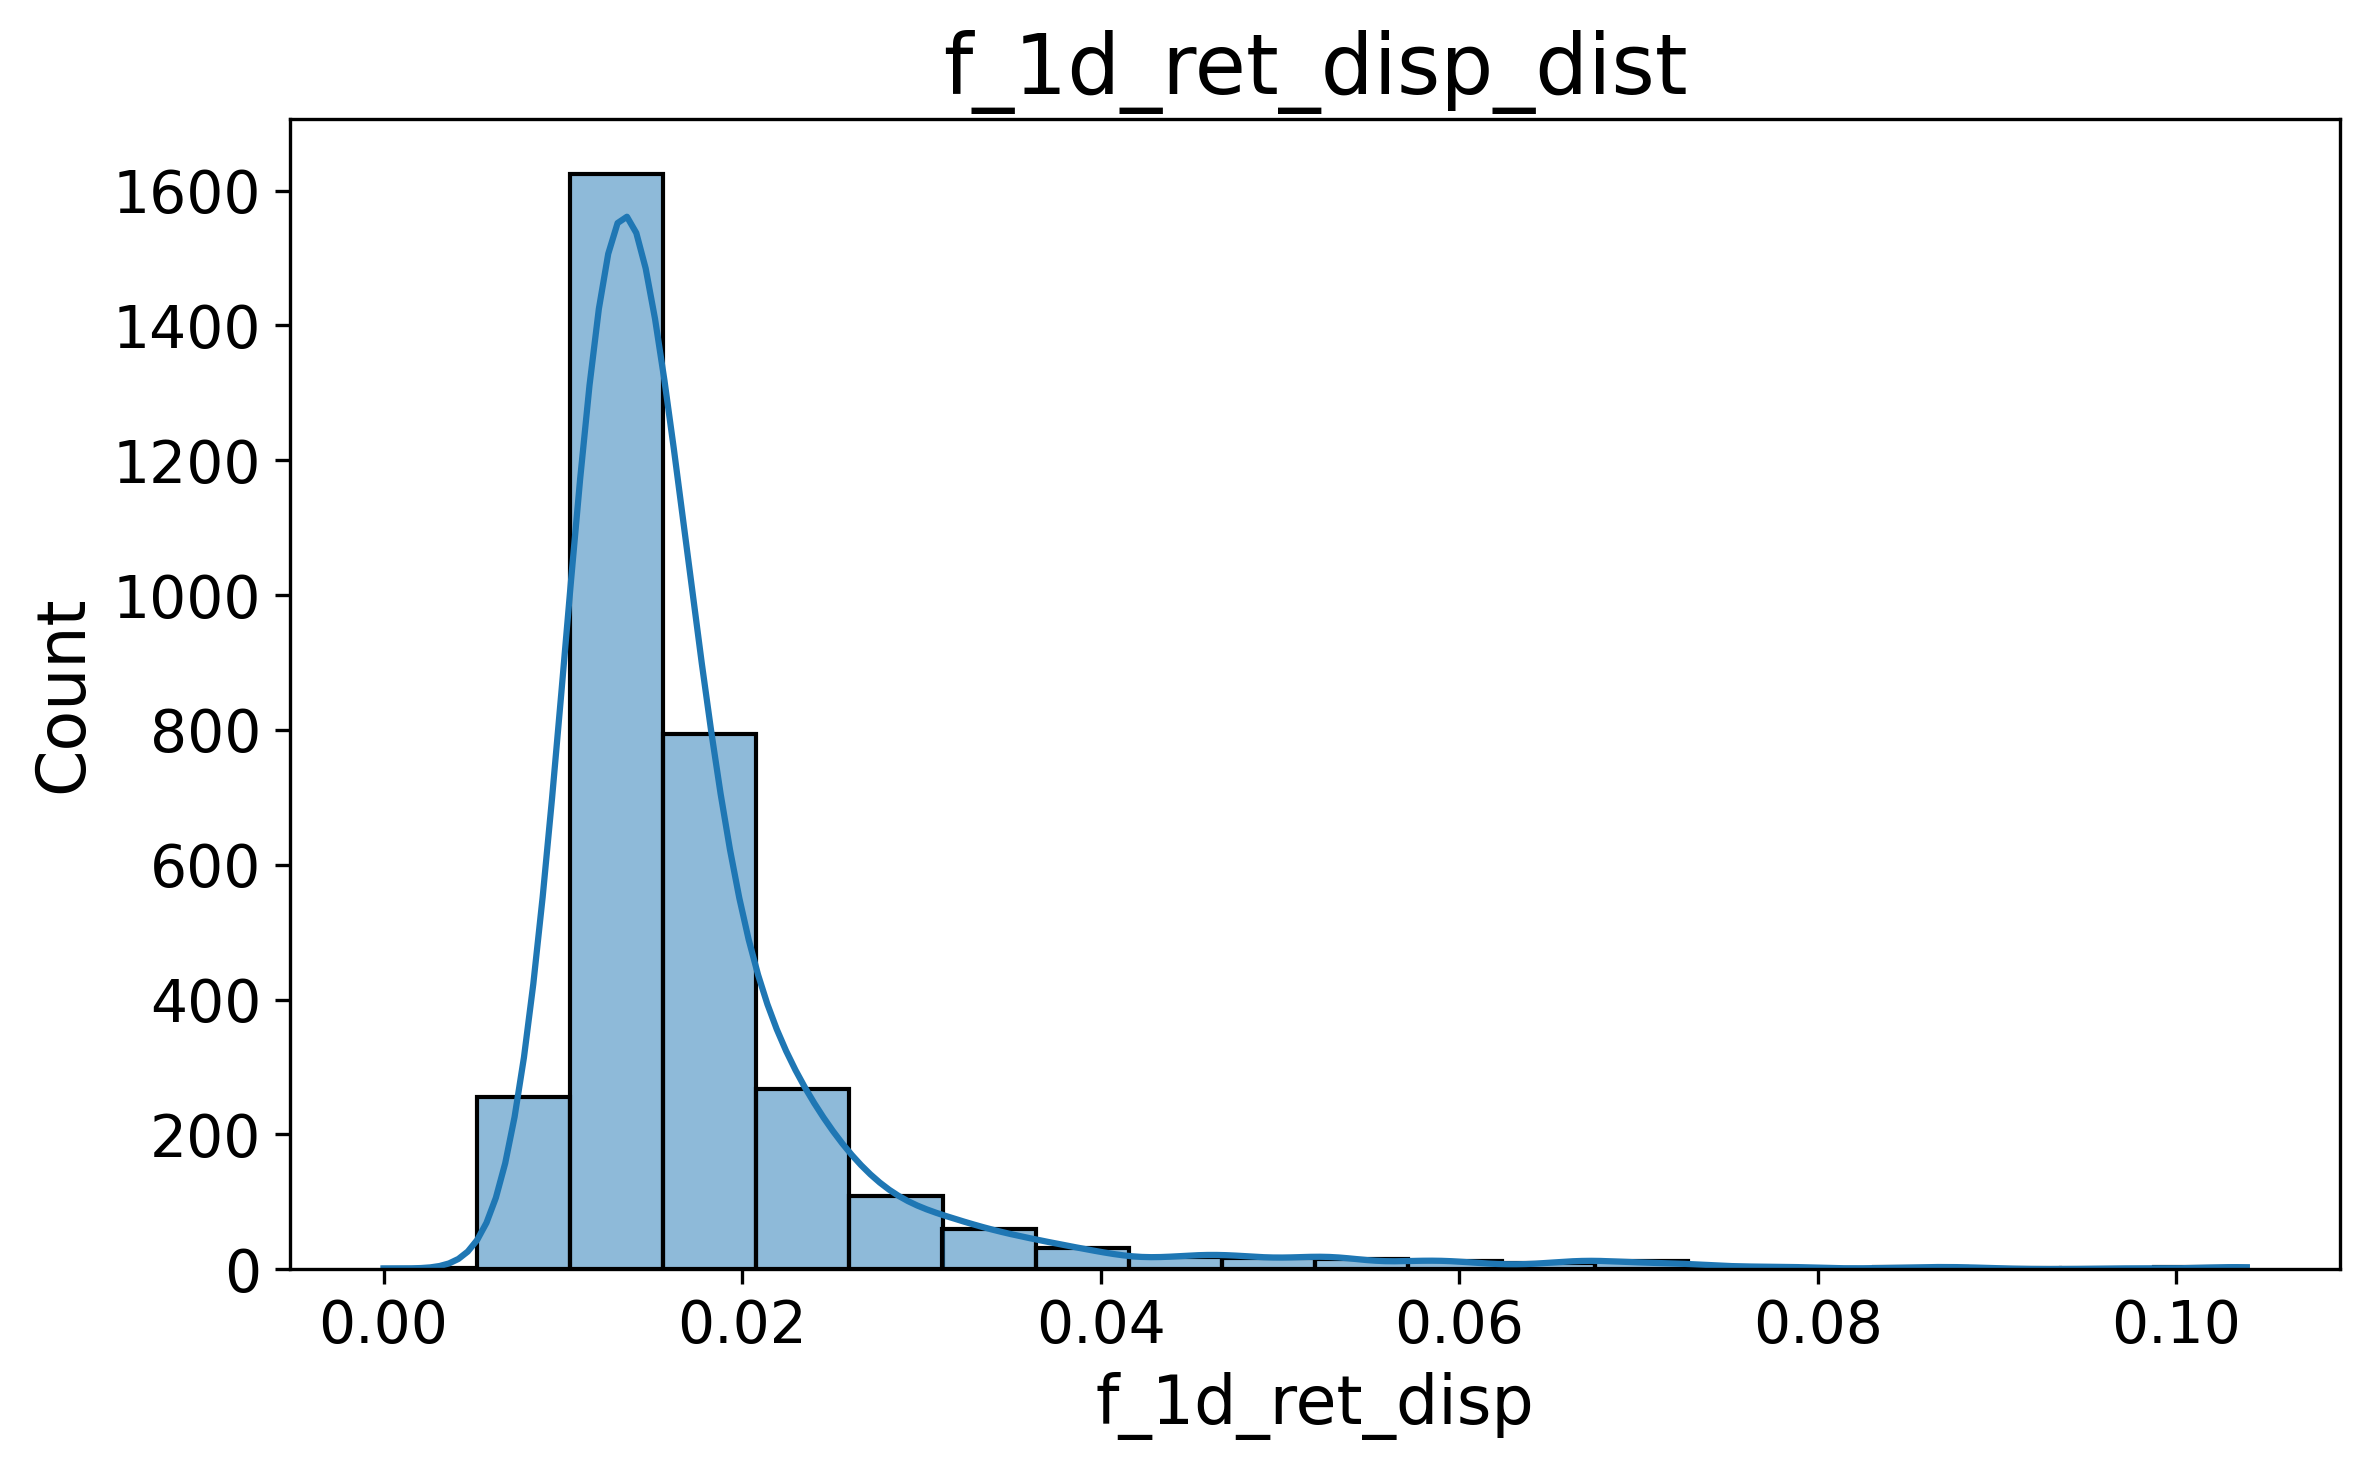

In [28]:
sns_hist(ret_disp, col = 'f_1d_ret_disp', xlabel = 'f_1d_ret_disp', ylabel = 'Count', title = 'f_1d_ret_disp_dist', save_path = 'f_1d_ret_disp_dist')

/home/liangzhp/anaconda3/envs/pnl/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



{'figsize': [8, 5], 'bins': 20, 'kde': True}


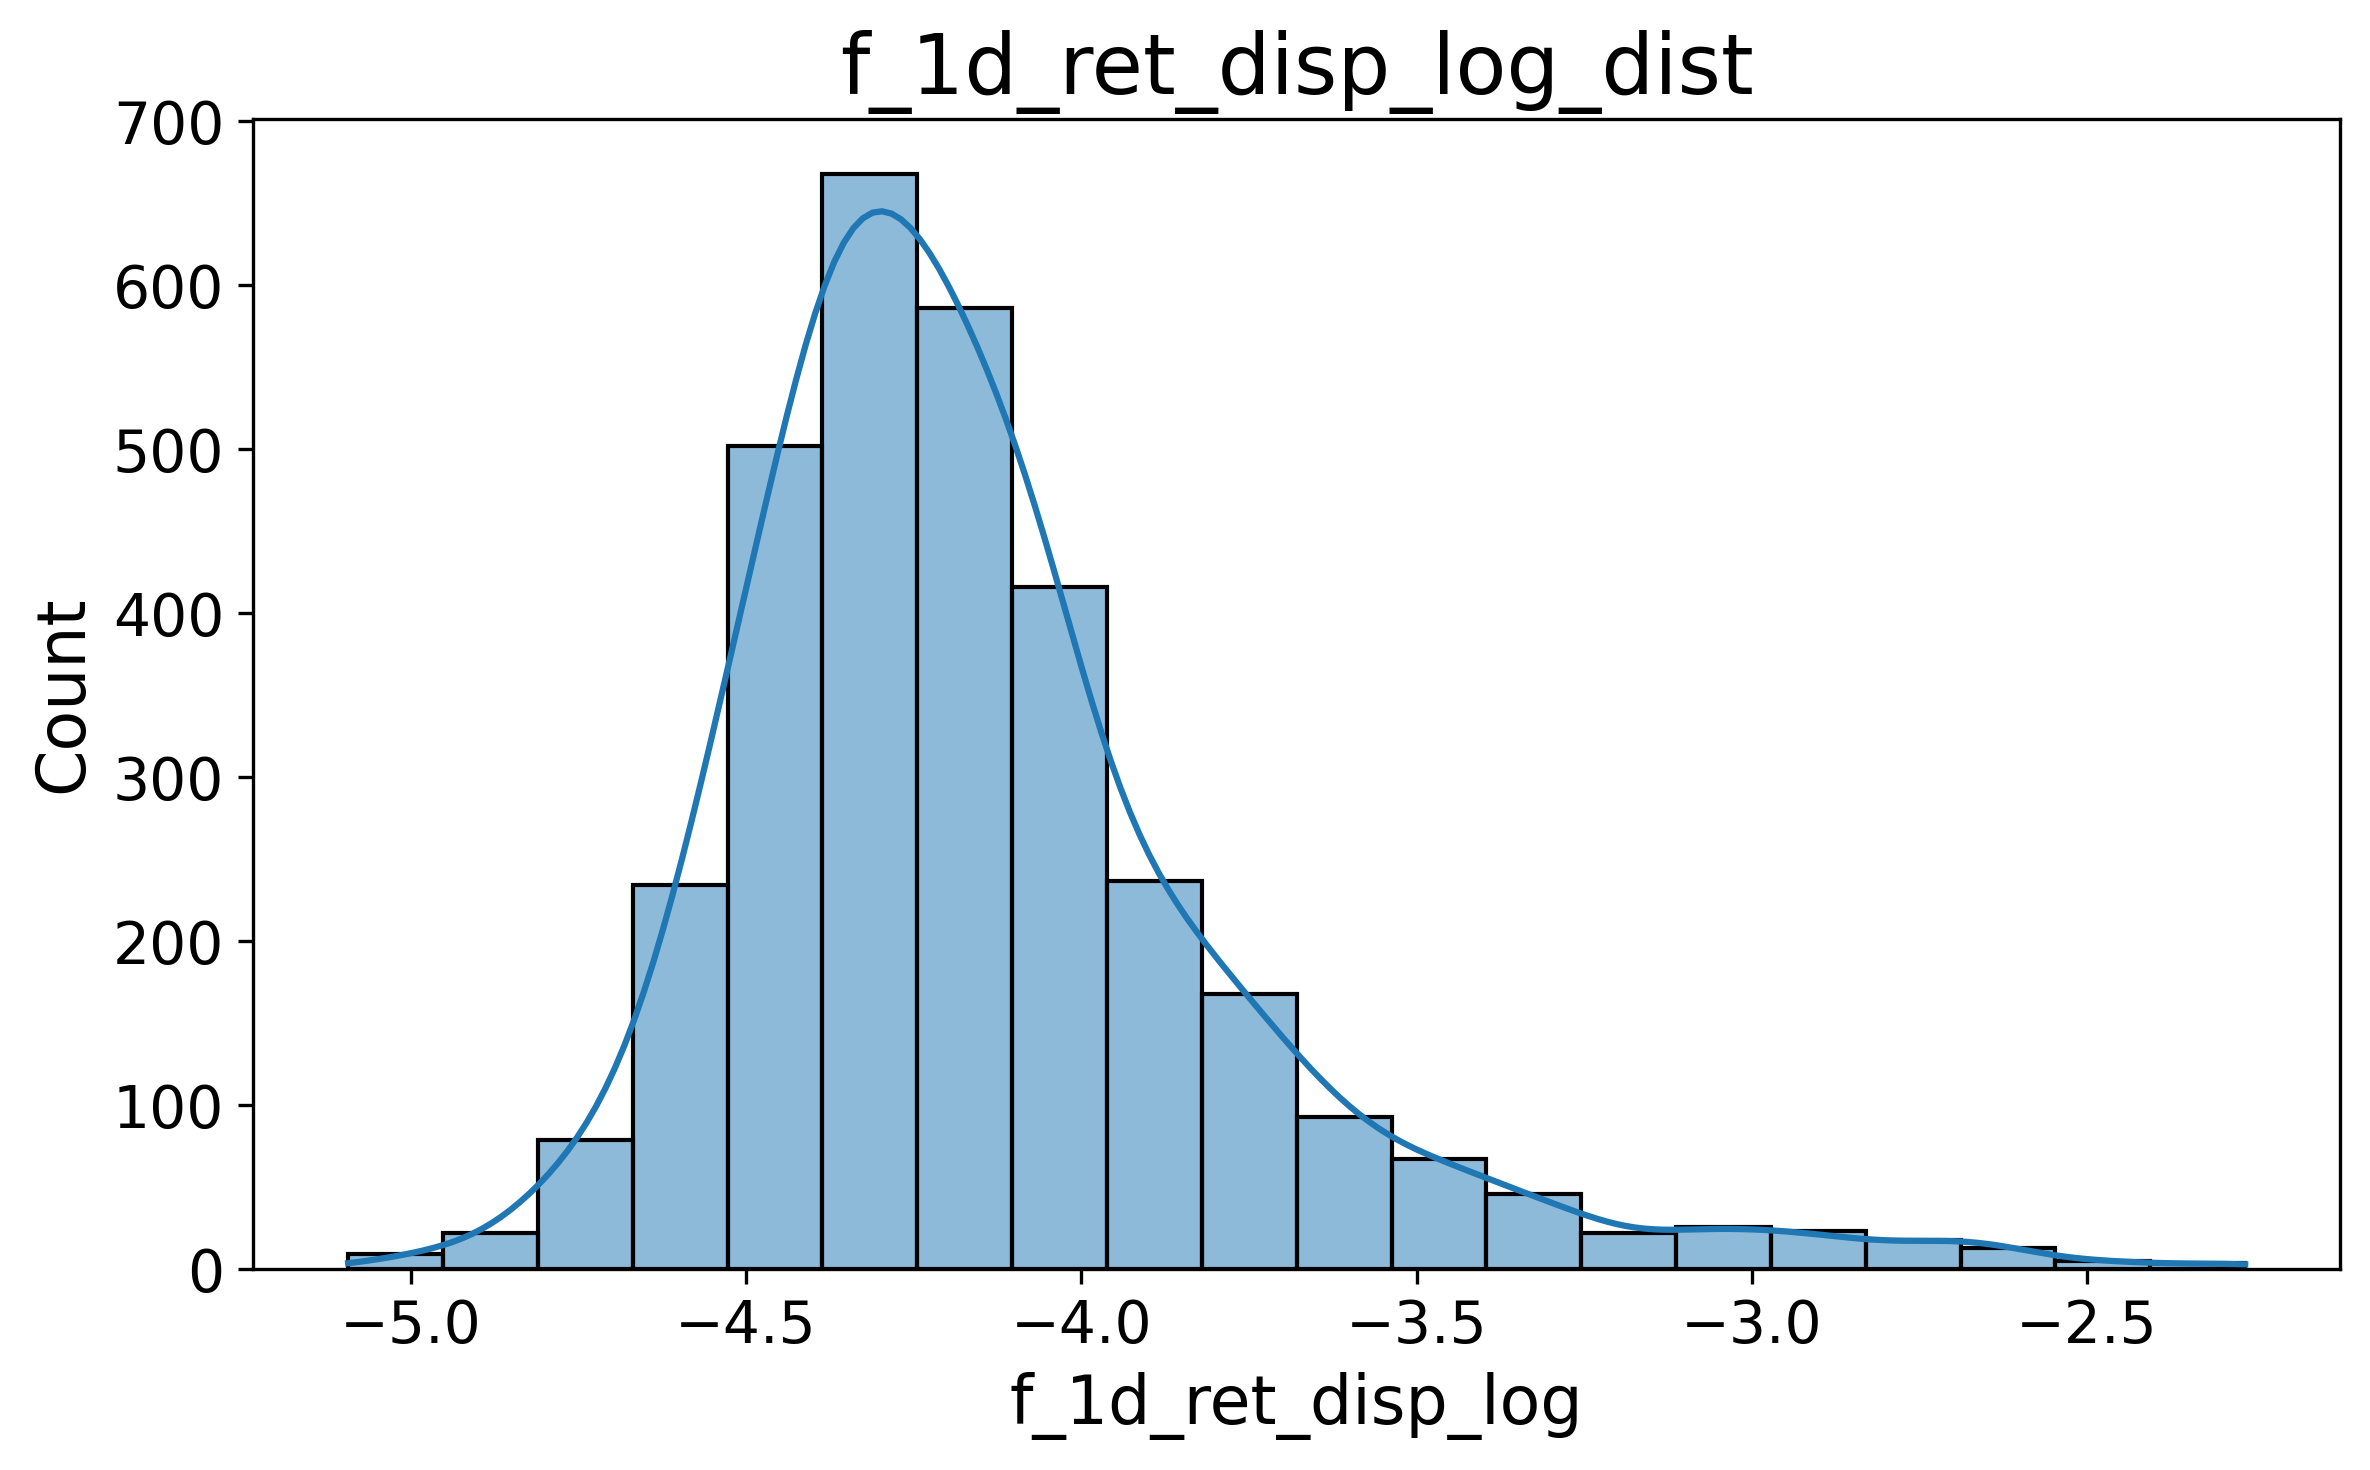

In [30]:
ret_disp['f_1d_ret_disp_log'] = np.log(ret_disp['f_1d_ret_disp'])
sns_hist(ret_disp, col = 'f_1d_ret_disp_log', xlabel = 'f_1d_ret_disp_log', ylabel = 'Count', title = 'f_1d_ret_disp_log_dist', save_path = 'f_1d_ret_disp_log_dist')

{'figsize': [8, 5], 'bins': 20, 'kde': True}


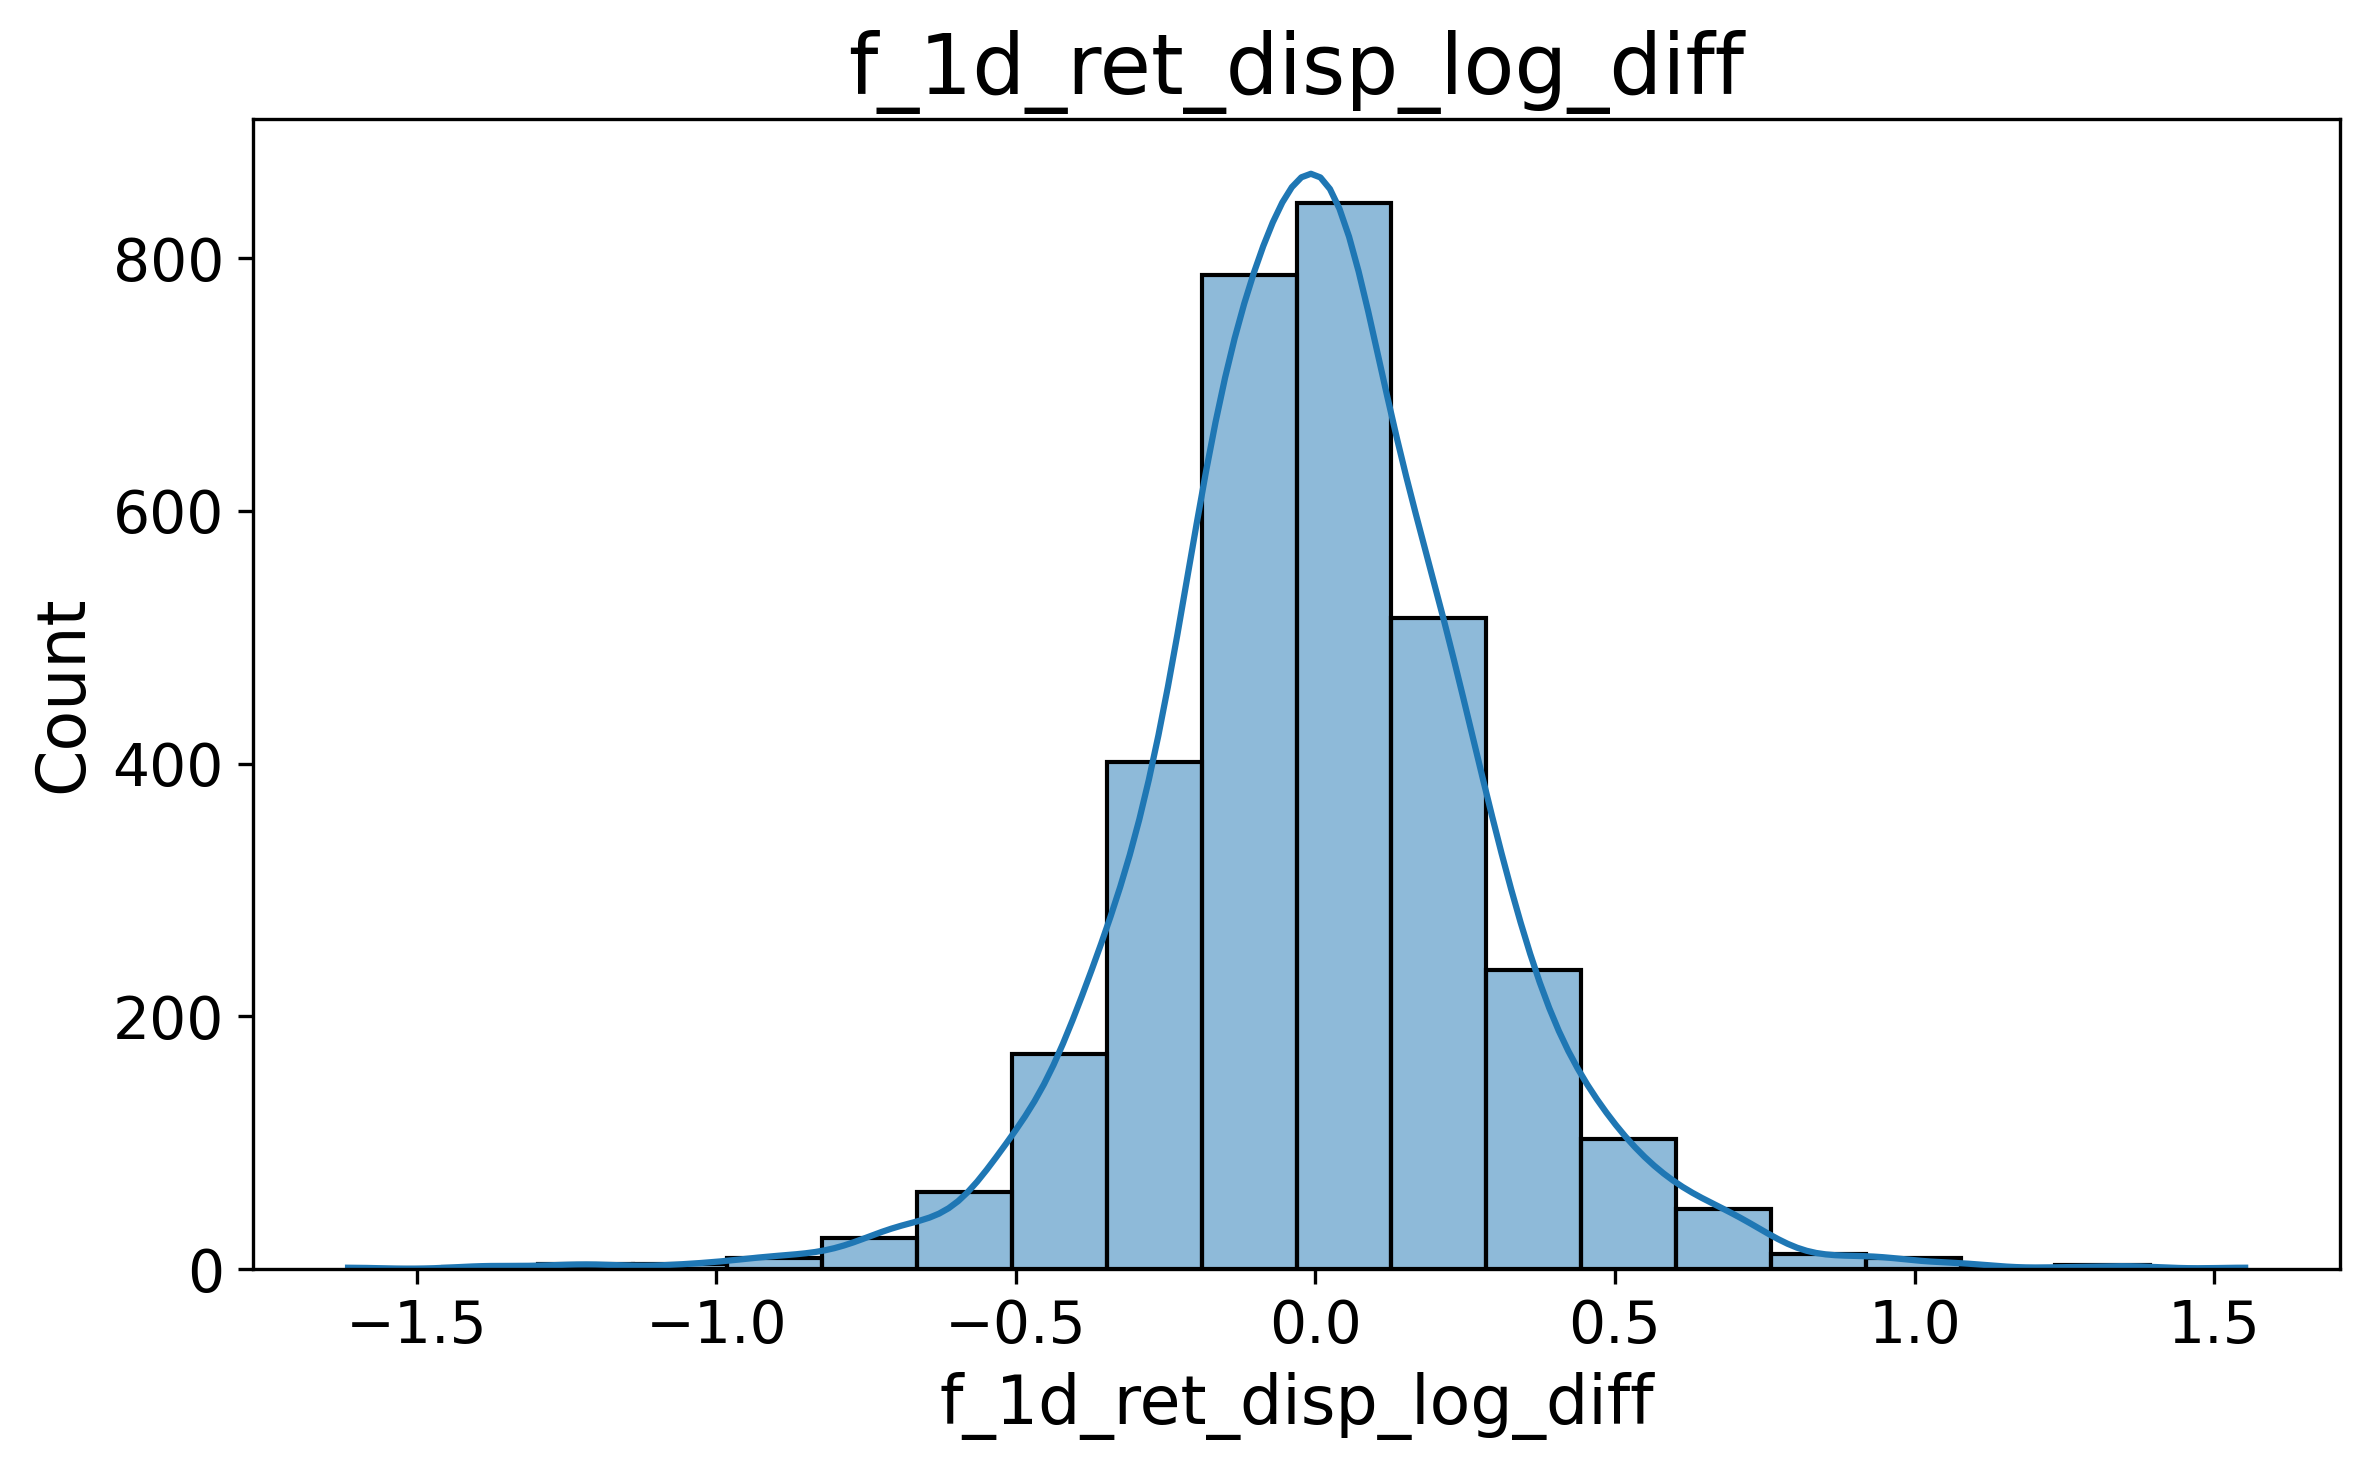

In [31]:
ret_disp['f_1d_ret_disp_log_diff'] = ret_disp['f_1d_ret_disp_log'].diff()
sns_hist(ret_disp, col = 'f_1d_ret_disp_log_diff', xlabel = 'f_1d_ret_disp_log_diff', ylabel = 'Count', title = 'f_1d_ret_disp_log_diff', save_path = 'f_1d_ret_disp_log_diff')

In [40]:
# filter out the first and last date 
ret_disp = ret_disp[~((ret_disp.loc[:, rets_disp_col] == 0).sum(axis = 1)>0)].reset_index(drop = True)


corr = ret_disp.drop('Date', axis = 1).corr()
np.fill_diagonal(corr.values, np.nan)
beautify(corr, 'Correlation between various Disp')

In [51]:
for ret in rets_col:
    ret_disp[f'{ret}_disp_log'] = np.log(ret_disp[f'{ret}_disp'])

for ret in rets_col:
    ret_disp[f'{ret}_disp_log_diff'] = ret_disp[f'{ret}_disp_log'].diff().fillna(0)

### monthly effect

In [44]:
# no significant montly effect 
if 'Date' in ret_disp.columns:
    ret_disp.set_index('Date', inplace = True)
years = ret_disp.index.year.unique()
yearly_data = {year: ret_disp[ret_disp.index.year == year] for year in years}
monthly_data = {year: data.resample('M').mean() for year, data in yearly_data.items()}
fig = go.Figure()

for year, data in monthly_data.items():
    fig.add_trace(go.Scatter(
        x=data.index.month,
        y=data['f_1d_ret_disp'],
        mode='lines+markers',
        name=str(year)
    ))

fig.update_layout(
    title='Monthly Effect Over Multiple Years',
    xaxis_title='Month',
    yaxis_title='Value',
    xaxis=dict(tickmode='array', tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']),
    legend_title='Year'
)

fig.show()

In [49]:
ret_disp.reset_index(inplace = True)
ret_disp['weekday'] = ret_disp['Date'].dt.weekday
ret_disp.groupby('weekday')['f_1d_ret_disp'].mean()

weekday
0    0.017584
1    0.017986
2    0.017253
3    0.016443
4    0.016839
Name: f_1d_ret_disp, dtype: float64

In [50]:
ret_disp.groupby('weekday')['f_1d_ret_disp'].std()

weekday
0    0.009817
1    0.009417
2    0.009187
3    0.009901
4    0.009363
Name: f_1d_ret_disp, dtype: float64

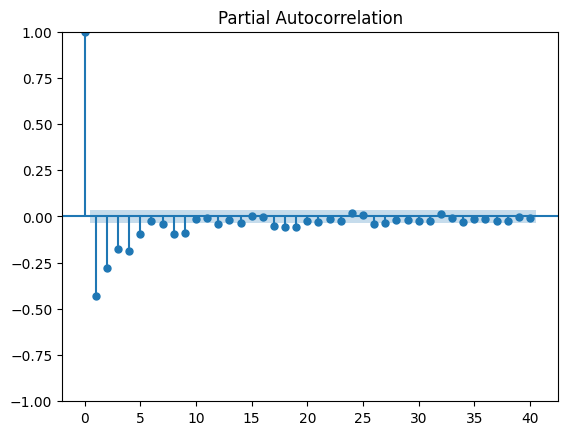

In [87]:
fig = plot_pacf(ret_disp['f_1d_ret_disp_log_diff'].values.squeeze(), lags=40, method="ywm")

fig.savefig('../figures/diff_pacf_plot.png')